In [1]:
import numpy as np
import pandas as pd

n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [2]:
class_0=pd.DataFrame({"Feature_1": np.random.normal(loc=0, scale=1, size=n_class_0),
                     "Feature_2": np.random.normal(loc=0, scale=1, size=n_class_0),
                     "Target": [0] * n_class_0})

class_1=pd.DataFrame({"Feature_1": np.random.normal(loc=0, scale=1, size=n_class_1),
                     "Feature_2": np.random.normal(loc=0, scale=1, size=n_class_1),
                    "Target": [1] * n_class_1})

In [3]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [4]:
df.tail()

,Feature_1,Feature_2,Target
995,-0.574405,0.608970,1
996,-0.534843,-0.430413,1
997,0.165891,-0.208233,1
998,-1.146355,0.908115,1
999,0.697216,1.084185,1


In [5]:
df.value_counts()

Feature_1  Feature_2  Target
-2.745759   0.336843  0         1
 0.458755   0.149771  0         1
 0.427061   0.843813  0         1
 0.428590   0.824215  0         1
 0.430218  -0.252678  0         1
                               ..
-0.378234  -0.932517  0         1
-0.377999   1.262223  0         1
-0.376073   0.412530  0         1
-0.375623   0.017845  0         1
 2.722666   0.557240  0         1
Length: 1000, dtype: int64

In [6]:
df.shape

(1000, 3)

In [7]:
df["Target"].value_counts()

0    900
1    100
Name: Target, dtype: int64

In [8]:
df_minority=df[df["Target"]==1]
df_majority=df[df["Target"]==0]

In [9]:
from sklearn.utils import resample

# upsampling

In [10]:
df_upsampling=resample(df_minority, replace=True, n_samples=len(df_majority))

In [11]:
df_upsampling.shape

(900, 3)

In [12]:
df_upsample=pd.concat([df_upsampling, df_majority])

In [13]:
df_upsample.shape

(1800, 3)

In [14]:
df_upsample["Target"].value_counts()

1    900
0    900
Name: Target, dtype: int64

# downsampling

In [15]:
df_downsampling=resample(df_majority, replace=True, n_samples=len(df_minority))

In [16]:
df_downsampling.shape

(100, 3)

In [17]:
df_downsample=pd.concat([df_minority, df_downsampling])

In [18]:
df_downsample.shape

(200, 3)

In [19]:
df_downsample["Target"].value_counts()

1    100
0    100
Name: Target, dtype: int64

In [20]:
df

,Feature_1,Feature_2,Target
0,-1.843198,-0.006983,0
1,1.066151,-0.984063,0
2,0.049853,0.366283,0
3,0.884666,-1.750853,0
4,1.642776,-1.652109,0
...,...,...,...
995,-0.574405,0.608970,1
996,-0.534843,-0.430413,1
997,0.165891,-0.208233,1
998,-1.146355,0.908115,1


In [21]:
import matplotlib.pyplot as plt

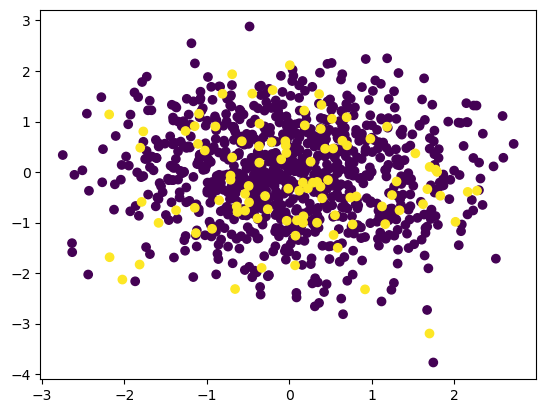

In [22]:
plt.scatter(df["Feature_1"], df["Feature_2"], c=df["Target"])